# Seminar 1 - Konsumentens valg nyttemaksimering LF

I dette seminaret skal vi se på hvordan konsumenter tar valg for å maksimere sin nytte gitt et budsjett.

## 1.2 Høyere strømpriser og endrede budsjettlinjer

Anne har en inntekt $I = 1$ som hun ønsker å bruke på mat $(A)$ og å bo i et godt oppvarmet hjem $(B)$. Prisen på mat og en varm bolig er i utgangspunktet gitt ved $P_A = P_B = 1$.

Anta at Anne har bestemt seg for å bruke like mye penger på bolig som på mat, slik at $P_A A = P_B B$. Dette betyr at hun bruker halvparten av inntekten sin på mat og halvparten på bolig.

a) Vis Annes budsjettlinje i en figur og marker hennes valg av konsum.

In [2170]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# Lager symboler
A,B  = sp.symbols('A B')

I = 1
P_A = 1
P_B_lav = 1

# Ligninger
Budsjett = sp.Eq(P_A*A + P_B_lav*B, I)
# like mye på begge
lite_forbruk = sp.Eq(P_A*A, P_B_lav*B)

display(Budsjett)
display(lite_forbruk)

Eq(A + B, 1)

Eq(A, B)

In [2171]:
# Løser budsjett for optimalt konsum
Løsning = sp.solve((Budsjett, lite_forbruk), (A, B))
a_løsning = Løsning[A]
b_løsning_lav = Løsning[B]

display(a_løsning), display(b_løsning_lav)

# For å visualisere trenger vi å vite budsjettlinjen
budsjettlinjen = sp.solve(Budsjett, A)[0]
display(budsjettlinjen)

1/2

1/2

1 - B

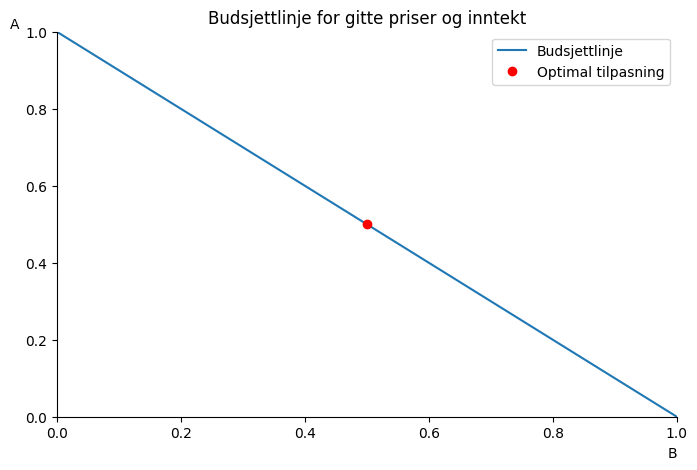

In [2172]:
# Visualisering av budsjettlinjen
b_verdier = np.linspace(0, 1, 100)

def create_ax():
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.set_xlabel('B', loc='right')
    ax.set_ylabel('A', loc='top', rotation=0)
    ax.spines['top'].set_color("none")
    ax.spines['right'].set_color("none")
    ax.set_title('Budsjettlinje for gitte priser og inntekt')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    return fig, ax


fig, ax = create_ax()
ax.plot(b_verdier, 1 - b_verdier, label='Budsjettlinje')
# optimal tilpasning
ax.plot(a_løsning, b_løsning_lav, 'ro', label='Optimal tilpasning')
ax.legend();

b) Anta så at prisen på strøm går opp slik at $P_B^{h} = 2$, hvor toppskrift "h" står for høy. Hva er helningen på den nye budsjettlinjen, og hva blir Annes tilpasning?

In [2173]:
P_B_høy = 2

# Ligninger
Budsjett = sp.Eq(P_A*A + P_B_høy*B, I)
# like mye på begge
lite_forbruk = sp.Eq(P_A*A, P_B_høy*B)

display(Budsjett)
display(lite_forbruk)

Eq(A + 2*B, 1)

Eq(A, 2*B)

In [2174]:
# Løser budsjett for optimalt konsum
Løsning = sp.solve((Budsjett, lite_forbruk), (A, B))
a_løsning = Løsning[A]
b_løsning = Løsning[B]

display(a_løsning.evalf()), display(b_løsning.evalf())

# For å visualisere trenger vi å vite budsjettlinjen
budsjettlinjen = sp.solve(Budsjett, A)[0]
display(budsjettlinjen)

0.500000000000000

0.250000000000000

1 - 2*B

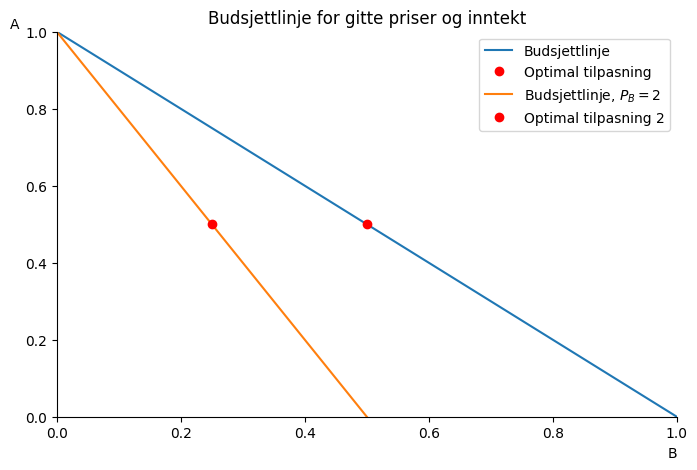

In [2175]:
ax.plot(b_verdier, 1 - 2*b_verdier, label='Budsjettlinje, $P_B=2$')
# optimal tilpasning
ax.plot(b_løsning, a_løsning, 'ro', label='Optimal tilpasning 2')
ax.legend();
fig

c) Regjeringen innfører en strømstøtte som gjør at prisen som konsumentene betaler, blir akkurat som før. Støtten per enhet konsumert er dermed $S_B = P_B^{h} - P_B^{l} = 1$, hvor $P_B^{l}$ er den opprinnelige, lave prisen. Hva er den samlede kostnaden $S_B$ av denne strømstøtten, hvor $S_B = S_B  B$?

In [2176]:
# Regjeringen innfører en subsidie
S_B = P_B_høy - P_B_lav

S_B

1

In [2177]:
B_med_subsidie = b_løsning_lav

display(B_med_subsidie.evalf())

0.500000000000000

In [2178]:
# Totalt forbruk av B øker med subsidien
total_subsidie = S_B * B_med_subsidie

display(total_subsidie.evalf())

0.500000000000000

d) Et alternativ til å gi prisstøtte kan være å gi en kontantstøtte til forbrukerne. Vis hvordan det å gi Anne en kontantstøtte $S$ (som er like stor som den hun skulle fått i strømsøtte, altså $S = S_B$) påvirker hennes budsjettlinje og tilpasning.

In [2179]:
I_kontantstøtte = I + total_subsidie

I_kontantstøtte.evalf()

1.50000000000000

In [2180]:
# Budsjettbetingelse
Budsjett = sp.Eq(P_A*A + P_B_høy*B, I_kontantstøtte)

display(Budsjett)

Eq(A + 2*B, 3/2)

In [2181]:
# Løser budsjett for optimalt konsum
Løsning = sp.solve((Budsjett, lite_forbruk), (A, B))

a_løsning = Løsning[A]
b_løsning = Løsning[B]

# show numeric solutions
display(a_løsning.evalf()), display(b_løsning.evalf())

# For å visualisere trenger vi å vite budsjettlinjen
budsjettlinjen = sp.solve(Budsjett, A)[0]
display(budsjettlinjen)

0.750000000000000

0.375000000000000

3/2 - 2*B

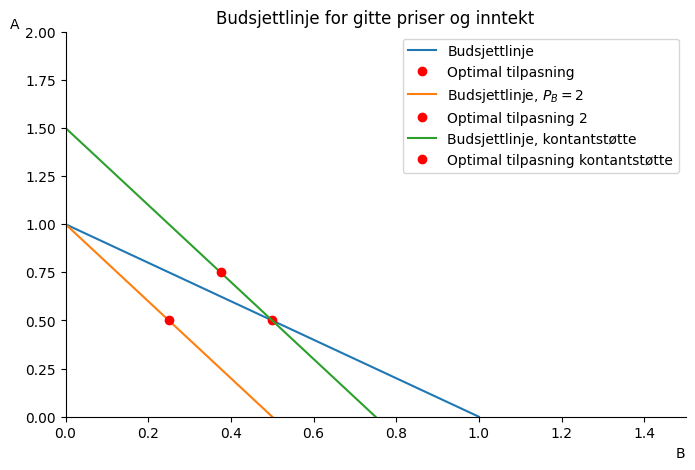

In [2182]:
b_verdier = np.linspace(0, I_kontantstøtte,100)

ax.plot(b_verdier, 3/2 - 2*b_verdier, label='Budsjettlinje, kontantstøtte')
# optimal tilpasning
ax.plot(b_løsning, a_løsning, 'ro', label='Optimal tilpasning kontantstøtte')
ax.legend();
ax.set_ylim(0, 2)
ax.set_xlim(0, 1.5)
fig

## 1.3 Anne og venninnen tilpasser seg ekte strømpriser

I oppgave 1.2 antok vi at Anne ønsket å bruke like mye penger på hvert gode. Nå skal vi gå litt mer formelt til verks. Anne og venninnen Beate sitter på en kafé og diskuterer smak og behag. 

Begge har preferanser gitt ved Cobb-Douglas nyttefunksjonen $U = A^{\alpha} B^{1-\alpha}$, hvor $A$ er mat og $B$ er en varm bolig. 

Anne bruker like mye penger på $A$ og $B$, mens venninnen bruker tre ganger så mye på bolig som på mat.

a) Hva er nyttevekten $a$ til Anne, og hva med Beate?

In [2183]:
# Cobb-douglas, generell utregning i python
U, A,B, a, I,P_A,P_B, lam= sp.symbols('U A B alpha I P_A P_B lambda')
I=1
U = A**a * B**(1-a)

U

A**alpha*B**(1 - alpha)

In [2184]:
# Budsjett
budsjett = P_A*A + P_B*B - I
budsjett

A*P_A + B*P_B - 1

In [2185]:
# Lagrange-funksjon
L = U + lam*budsjett

L

A**alpha*B**(1 - alpha) + lambda*(A*P_A + B*P_B - 1)

In [2186]:
# Deriverer
dL_dA = sp.diff(L, A)
dL_dB = sp.diff(L, B)
dL_dlam = sp.diff(L, lam)

# Printer
display(dL_dA)
display(dL_dB)
display(dL_dlam)

P_A*lambda + A**alpha*B**(1 - alpha)*alpha/A

A**alpha*B**(1 - alpha)*(1 - alpha)/B + P_B*lambda

A*P_A + B*P_B - 1

In [2187]:
# Løser for A, B og lambda
solutions = sp.solve(
    (dL_dA, dL_dB, dL_dlam),
    (A, B, lam),
    simplify=True
)

# Henter ut løsning for A og B
A_løsning, B_løsning, lam_løsning = solutions[0]

display(A_løsning)
display(B_løsning)

alpha/P_A

(1 - alpha)/P_B

In [2188]:
# Utgifter
display(sp.simplify(P_A * A_løsning), sp.simplify(P_B * B_løsning))

alpha

1 - alpha

## Her er løsningen for Anne og Beate på oppgave a

In [2189]:
# Dermed blir Annes alpha
alpha_anne = sp.solve(sp.Eq(a, 1-a),a)[0]

alpha_anne

1/2

Så nyttefunksjonen til Anne er gitt ved:

$$U_{Anne} = A^{0.5} B^{0.5}$$

In [2190]:
# Beates alpha
alpha_beate = sp.solve(sp.Eq(1-a, 3*a), a)[0]
alpha_beate

1/4

Og nyttefunksjonen til Beate er gitt ved:

$$U_{Beate} = A^{0.25} B^{0.75}$$

b) Prisen på de to godene er i utgangspunktet $P_B = P_A = 1$, og de to venninnene begge har en inntekt $I = 1$. Hva er deres konsum av $A$ og $B$? Regn ut og illustrer i en figur.

In [2191]:
P_A = 1
P_B = 1

# Optimal etterspørsel (Cobb-Douglas)
def optimal_konsum(alpha):
    A_opt = (alpha * I) / P_A
    B_opt = ((1 - alpha) * I) / P_B
    return sp.simplify(A_opt), B_opt

# Her er løsningen for Anne og Beate på oppgave b
A_anne, B_anne = optimal_konsum(alpha_anne)
A_beate,B_beate = optimal_konsum(alpha_beate)

display(A_anne.evalf(), B_anne.evalf())
display(A_beate.evalf(), B_beate.evalf())

0.500000000000000

0.500000000000000

0.250000000000000

0.750000000000000

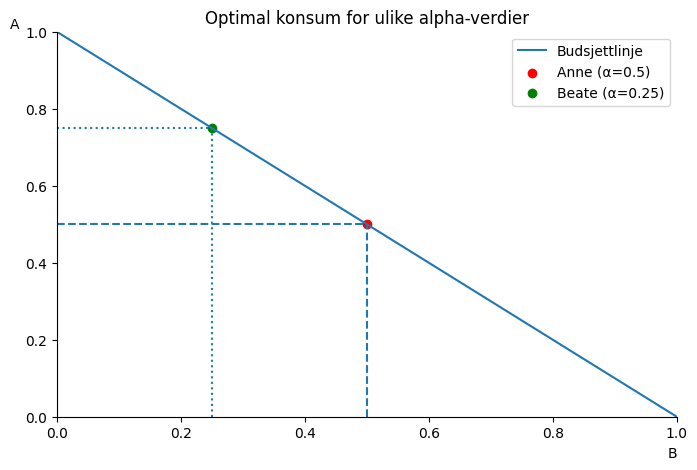

In [2192]:
a_verdier = np.linspace(0.001, 1, 200)

fig, ax = create_ax()
ax.plot(a_verdier, (1 - a_verdier) , label='Budsjettlinje')
ax.set_title('Optimal konsum for ulike alpha-verdier')

ax.scatter(float(A_anne.evalf()), float(B_anne.evalf()), color='red', label='Anne (α=0.5)')
ax.scatter(float(A_beate.evalf()), float(B_beate.evalf()), color='green', label='Beate (α=0.25)')
ax.vlines(A_anne, ymin=0, ymax=B_anne, linestyles="dashed")
ax.hlines(B_anne, xmin=0, xmax=A_anne, linestyles="dashed")
ax.vlines(A_beate, ymin=0, ymax=B_beate, linestyles="dotted")
ax.hlines(B_beate, xmin=0, xmax=A_beate, linestyles="dotted")
ax.legend();

In [2193]:
# Dette er ikke nødvendig å gjøre men gjør det mer intuitivt

alpha_anne = float(alpha_anne.evalf())
alpha_beate = float(alpha_beate.evalf())

# Indifferenskurver
def indifferenskurve(A_verdier, alpha, U0):
    return (U0 / A_verdier**alpha)**(1/(1-alpha))

# Nyttenivåer (U = A^alpha * B^(1-alpha))
U_anne = A_anne**alpha_anne * B_anne**(1-alpha_anne)
U_beate = A_beate**alpha_beate * B_beate**(1-alpha_beate)

U_anne = float(U_anne.evalf())
U_beate = float(U_beate.evalf())

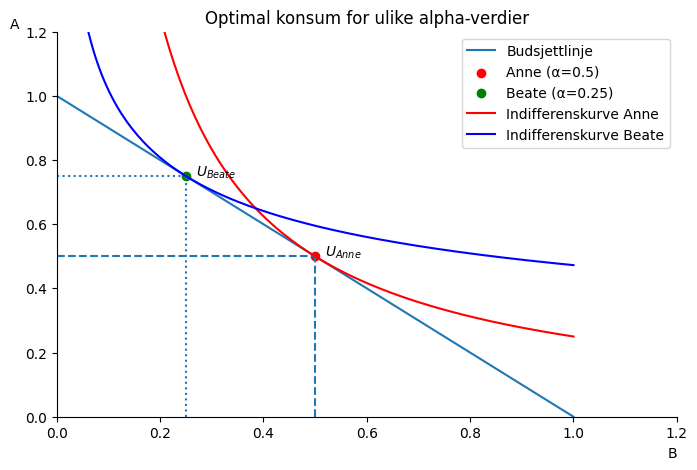

In [2194]:
# Tegn indifferenskurver
ax.plot(a_verdier, indifferenskurve(a_verdier, alpha_anne, U_anne), color='red', linestyle='-', label="Indifferenskurve Anne")
ax.plot(a_verdier, indifferenskurve(a_verdier, alpha_beate, U_beate), color='blue', linestyle='-', label="Indifferenskurve Beate")

# Tekst
ax.text(A_anne+0.02, B_anne, "$U_{Anne}$")
ax.text(A_beate+0.02, B_beate, "$U_{Beate}$")
ax.legend();
ax.set_ylim(0, 1.2)
ax.set_xlim(0, 1.2)
fig

c) Prisen på strøm øker så til $P_B^{h} = 2$. "Hvor mye har du skrudd ned varmen i leiligheten?" spør Anne. "Bruker du mindre penger på mat nå" lurer venninnen på. Hva er svaret ditt på disse spørsmålene?

Når prisen på strøm øker slik at $P_B^{h} = 2$, så dreier budsjettlinjen til ny tilpasning gitt ved:

$$
B = \frac{I - P_A A}{P_B^{h}} = \frac{1 - 1 \cdot A}{2} = \frac{1 - A}{2}
$$

og vi får en ny tilpasning for Anne og Beate, som vist i figuren nedenfor.

Vi ser fra uttrykkene for optimalt konsum i deloppgave a) at konsumet av $B$ nå er halvert:

$$
B_{Anne} = \frac{(1-\alpha_A)I}{P_B^{h}} = 0.25
$$

$$
B_{Beate} = \frac{(1-\alpha_B)I}{P_B^{h}} = 0.375
$$

Siden Beate brukte mer penger på bolig fra før, så vil hun måtte skru ned varmen (altså redusere $B$) mer enn det Anne må. Vi legger for øvrig merke til at økningen i strømprisene ikke påvirker deres etterspørsel etter mat. Slik er det med Cobb-Douglas-preferanser, krysspriseffekten er lik null.

In [2195]:
P_B = 2

# Her er løsningen for Anne og Beate på oppgave c
A_anne, B_anne = optimal_konsum(alpha_anne)
A_beate,B_beate = optimal_konsum(alpha_beate)

display(A_anne, B_anne)
display(A_beate, B_beate)

0.500000000000000

0.25

0.250000000000000

0.375

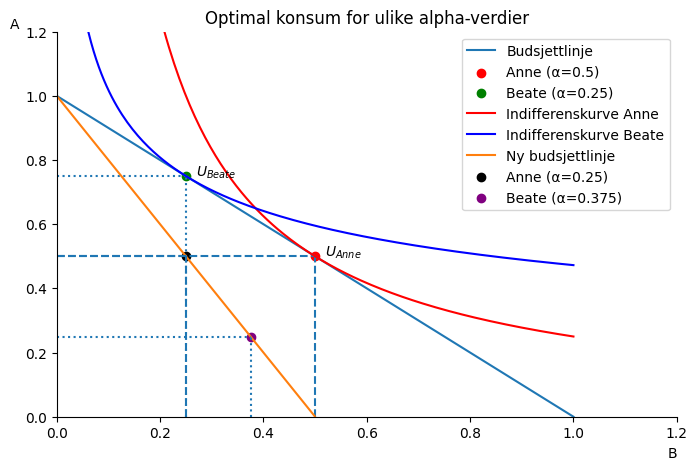

In [2196]:
ax.plot((1 - a_verdier)/2, a_verdier , label='Ny budsjettlinje')
ax.set_title('Optimal konsum for ulike alpha-verdier')

ax.scatter(float(B_anne), float(A_anne), color='black', label='Anne (α=0.25)')
ax.scatter(float(B_beate), float(A_beate), color='purple', label='Beate (α=0.375)')
ax.vlines(B_anne, ymin=0, ymax=A_anne, linestyles="dashed")
ax.hlines(A_anne, xmin=0, xmax=B_anne, linestyles="dashed")
ax.vlines(B_beate, ymin=0, ymax=A_beate, linestyles="dotted")
ax.hlines(A_beate, xmin=0, xmax=B_beate, linestyles="dotted")
ax.legend();
fig

In [2197]:
# Dette er ikke nødvendig å gjøre men gjør det mer intuitivt

alpha_anne = float(alpha_anne)
alpha_beate = float(alpha_beate)

# Indifferenskurver
def indifferenskurve(A_verdier, alpha, U0):
    return (U0 / A_verdier**alpha)**(1/(1-alpha))

# Nyttenivåer (U = A^alpha * B^(1-alpha))
U_anne = A_anne**alpha_anne * B_anne**(1-alpha_anne)
U_beate = A_beate**alpha_beate * B_beate**(1-alpha_beate)

U_anne = float(U_anne)
U_beate = float(U_beate)

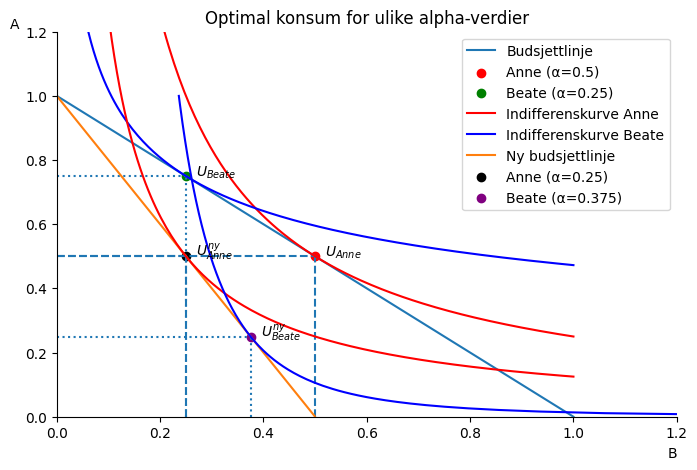

In [2198]:
# Tegn indifferenskurver
ax.plot(a_verdier, indifferenskurve(a_verdier, alpha_anne, U_anne), color='red', linestyle='-')
ax.plot(indifferenskurve(a_verdier, alpha_beate, U_beate), a_verdier, color='blue', linestyle='-')

# Tekst
ax.text(B_anne+0.02, A_anne, "$U_{Anne}^{ny}$")
ax.text(B_beate+0.02, A_beate, "$U_{Beate}^{ny}$")
ax.legend();
ax.set_ylim(0, 1.2)
ax.set_xlim(0, 1.2)
fig

## 1.4 Prisstøtte eller kontantstøtte?

Myndighetene diskuterer hvordan de kan hjelpe befolkningen i en tid med høye strømpriser. Anne har preferansene over mat $A$ og en varm bolig $B$ gitt ved $U = A^{0.5}B^{0.5}$ og hennes inntekt er $I = 1$.

Før prisøkningen kostet strømmen $P_B^{l} = 1$, men den har steget nå til $P_B{h} = 2$. Prisen på mat ligger fast, $P_A = 1$.

Forslaget fra myndighetene er å gi en prisstøtte som gjør at kundene møter akkurat samme pris som før. Du er nyansatt økonom i Finansdepartementet og argumenterer for at man heller bør gi denne støtten som en kontantstøtte. Bruk mikroøkonomisk teori, og Anne for eksempel, for å vise hvorfor du mener kontantstøtte er bedre.

Med prisstøtte som gjør at Anne ikke kjenner noe til økningen i markedsprisen på strøm, så tilpasser hun seg i punkt $U_{Anne}$, i figuren ovenfor. Dette gir henne samme nytte som før prisøkningen.

Størrelsen på prissubsidien er $S = 0.5$, som vist i oppgave 1.2. Du argumenterer for at man heller bør gi dette beløpet som en kontantstøtte. Annes samlede inntekt blir da $I + S = 1.5$, og budsjettlinjen parallellforskyves utover (i forhold til situasjon med høy strømpris, men uten støtte) med ny budsjettlinje. 

Denne krysser punkt $U_{Anne}$, siden kontantstøtten gjør det mulig for henne å kjøpe like mye strøm som med prisstøtten. Men med kontantstøtte vil ikke Anne velge å tilpasse seg i punkt $U_{Anne}$.

Med en balansert Cobb-Douglas-nyttefunksjon vet vi at Anne ønsker å bruke like mye penger på hvert gode (akkurat som i oppgave 1.2, selv om vi da bare antok at det var slik). Med inntekt etter kontantstøtte $I + S = 1.5$, $P_A = 1$ og £P_B = 2$ får vi da $A = 0.75$ og $B = 0.375$. 

In [ ]:
I = I + total_subsidie

# Her er for å lage figur for oppgave d
A_anne, B_anne = optimal_konsum(alpha_anne)
A_beate,B_beate = optimal_konsum(alpha_beate)

display(A_anne, B_anne)
display(A_beate, B_beate)

0.750000000000000

0.375000000000000

0.375000000000000

0.562500000000000

In [ ]:
alpha_anne = float(alpha_anne)
alpha_beate = float(alpha_beate)

# Indifferenskurver
def indifferenskurve(A_verdier, alpha, U0):
    return (U0 / A_verdier**alpha)**(1/(1-alpha))

# Nyttenivåer (U = A^alpha * B^(1-alpha))
U_anne = A_anne**alpha_anne * B_anne**(1-alpha_anne)
U_beate = A_beate**alpha_beate * B_beate**(1-alpha_beate)

U_anne = float(U_anne)
U_beate = float(U_beate)

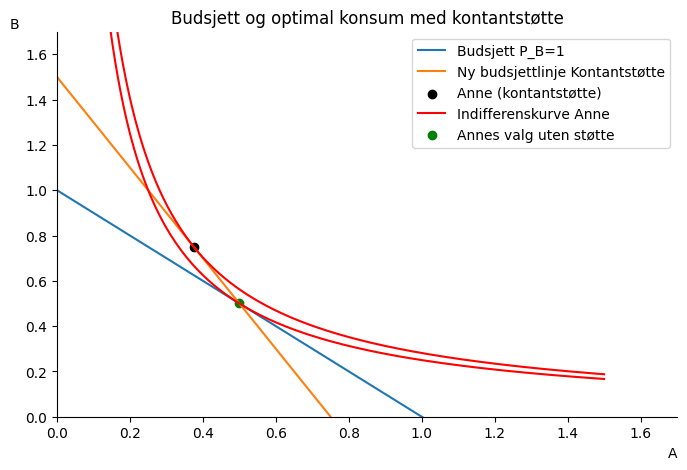

In [2201]:
# Opprett figur
fig, ax = create_ax()

# a-verdier
a_verdier = np.linspace(0.001, 1.5, 200)

# Budsjettlinjer
ax.plot(a_verdier, 1 - a_verdier, label='Budsjett P_B=1')
ax.plot((1.5 - a_verdier)/2, a_verdier, label='Ny budsjettlinje Kontantstøtte')

# Optimalpunkter med kontantstøtte
ax.scatter(float(B_anne), float(A_anne), color='black', label='Anne (kontantstøtte)')
# Indifferenskurve for Anne
ax.plot(a_verdier, indifferenskurve(a_verdier, alpha_anne, U_anne), color='red', linestyle='-')
# Gammel indifferenskurve for Anne
ax.plot(a_verdier, indifferenskurve(a_verdier, 0.5, 0.5), color='red', linestyle='-', label='Indifferenskurve Anne')
ax.scatter(0.5, 0.5, color='green', label='Annes valg uten støtte')
# Akser og title
ax.set_xlim(0, 1.7)
ax.set_ylim(0, 1.7)
ax.set_xlabel("A", loc='right')
ax.set_ylabel("B", rotation=0, loc='top')
ax.set_title("Budsjett og optimal konsum med kontantstøtte")
ax.legend()
plt.show()

Hennes nytte i det sorte punktet med kontantstøtte er :

$$
U_c = 0.75^{0.5} \cdot 0.375^{0.5} = 0.53
$$

Vi ser at kontantstøtten da gir Anne høyere nytte enn et tilsvarende beløp i strømprisstøtte. Årsaken er at en kontantstøtte gir Anne større frihet til å disponere midlene som hun selv vil, mens en prisstøtte er knyttet til konsumet av et bestemt gode. Vi ser da også at Anne bruker mindre strøm (lavere $B$) med kontantstøtte enn med subsidiert strømpris. Kontantstøtten er derfor en bedre politikk for å hjelpe konsumentene.